# Credit Card Fraud Detection

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Important-libraries" data-toc-modified-id="Important-libraries-0">Important libraries</a></span></li><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1">Loading data</a></span></li><li><span><a href="#important-functions" data-toc-modified-id="important-functions-2">important functions</a></span></li><li><span><a href="#Analyzing-our-data" data-toc-modified-id="Analyzing-our-data-3">Analyzing our data</a></span></li><li><span><a href="#Data-balance-with-SMOTE" data-toc-modified-id="Data-balance-with-SMOTE-4">Data balance with SMOTE</a></span></li><li><span><a href="#Traditional-way-of-catching-fraud" data-toc-modified-id="Traditional-way-of-catching-fraud-5">Traditional way of catching fraud</a></span></li><li><span><a href="#Correlation-analysis" data-toc-modified-id="Correlation-analysis-6">Correlation analysis</a></span></li><li><span><a href="#XY-Split" data-toc-modified-id="XY-Split-7">XY Split</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-8">Outliers</a></span></li><li><span><a href="#Normality" data-toc-modified-id="Normality-9">Normality</a></span></li><li><span><a href="#Logistic-Regression-with-imbalance-data" data-toc-modified-id="Logistic-Regression-with-imbalance-data-10">Logistic Regression with imbalance data</a></span></li><li><span><a href="#Logistic-Regressionn-combined-with-SMOTE" data-toc-modified-id="Logistic-Regressionn-combined-with-SMOTE-11">Logistic Regressionn combined with SMOTE</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-12">Decision Trees</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-13">Random Forest</a></span></li></ul></div>

## Important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline 
import seaborn as sns
from sklearn.datasets import make_classification

## Loading data

In [2]:

df=pd.read_csv("Data/creditcard/creditcard.csv")
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## important functions

In [3]:
def plot_data(X,y):
    plt.figure(figsize=(12, 8))
    plt.title('Data imbalance representation')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='class 1')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='class 0')
    plt.legend()
    plt.grid(False)
    
    return plt.show()

In [4]:
def outliers_removal(column):
    percentile25 = X[column].quantile(0.25)
    percentile75 = X[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    X[X[column] > upper_limit]

    X[X[column] < lower_limit]
    new_X = X[X[column] < upper_limit]
    new_X.shape
    new_X_cap = X.copy()
    new_X_cap[column] = np.where(
        new_X_cap[column] > upper_limit,
        upper_limit,
        np.where(
            new_X_cap[column] < lower_limit,
            lower_limit,
            new_X_cap[column]
        )
    )
    plt.figure(figsize=(8,8))

    plt.subplot(2,2,1)
    sns.boxplot(X[column],palette="viridis")

    plt.subplot(2,2,2)
    sns.boxplot(new_X_cap[column],palette="viridis")

    plt.show()

## Analyzing our data


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#We do not need the feature "Time" for this analysis, so I will delete it
df=df.drop(columns=['Time'])

In [7]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
#Do we have any missing value?
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 the feature "Class" is our target variable. This variable has two possible values: 
 1 for fraudulent transactions and 0 for no fraudulent transactions. 
A very commun problem in classification datasets is classs imbalance. This means that the dataset contains an imbalance number of fraudulents and no-fraudulents transactions. ML algorithms works better when the different classes are equally represented  

In [9]:
vc_df=df['Class'].value_counts()
vc_df

0    284315
1       492
Name: Class, dtype: int64

In [10]:
#ratio of fraudulent transactions
vc_df/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

We can see that fraudulent transactions represent only 0.1727% of our datasets meanwhile non-fraudulent transactions respresent 0.998273%.
it is confirmed we have class imbalance in our dataset. 
 


A good starting point, especially in fraud analysis, is visualizing your data before making any changes. Here we will visualize our fraud and non-fraud ratio. 


In [11]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, weights=[0.2, 0.8], class_sep=0.95, random_state=0)

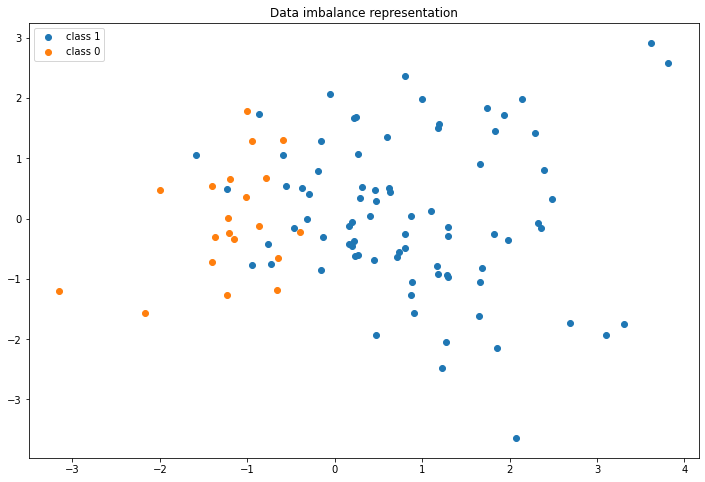

In [12]:
plot_data(X,y)

The plot helps us to see the data imbalance problem very clear. 

## Traditional way of catching fraud
First you'll define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. This is common practice within fraud analytics teams.

Statistical thresholds are often determined by looking at the mean values of observations. Let's start this exercise by checking whether feature means differ between fraud and non-fraud cases. Then, you'll use that information to create common sense thresholds. Finally, you'll check how well this performs in fraud detection.


In [13]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

In [15]:
# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud       0     1
Actual Fraud               
0              283089  1226
1                 322   170


With this first approach we have detected 170 of 492 fraudulent cases, but we got 1226 false positives. Now we will see how we can improve these numbers with ML

## Correlation analysis

In [16]:
df[df.columns[1:]].corr()['Class'][:].sort_values(ascending=False)

Class            1.000000
flag_as_fraud    0.202890
V11              0.154876
V4               0.133447
V2               0.091289
V21              0.040413
V19              0.034783
V20              0.020090
V8               0.019875
V27              0.017580
V28              0.009536
Amount           0.005632
V26              0.004455
V25              0.003308
V22              0.000805
V23             -0.002685
V15             -0.004223
V13             -0.004570
V24             -0.007221
V6              -0.043643
V5              -0.094974
V9              -0.097733
V18             -0.111485
V7              -0.187257
V3              -0.192961
V16             -0.196539
V10             -0.216883
V12             -0.260593
V14             -0.302544
V17             -0.326481
Name: Class, dtype: float64

## XY Split

In [17]:
X=df.drop('Class', axis=1)
y=df.Class
X=X._get_numeric_data()

<AxesSubplot:>

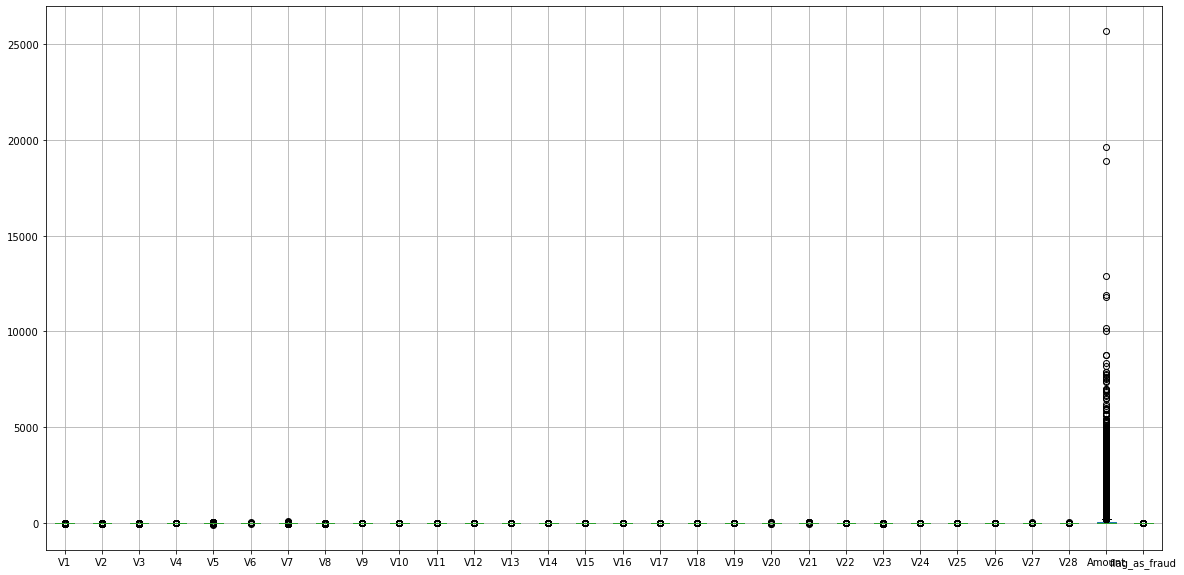

In [18]:
X.boxplot(figsize=(20,10))

## Outliers

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


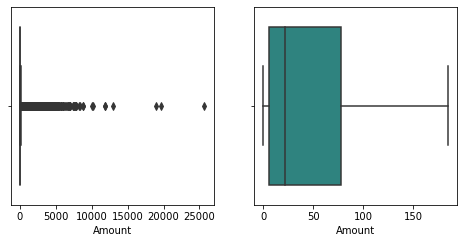

In [19]:
outliers_removal("Amount")

In [20]:
df=df[df["Amount"]<5000]

In [21]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,flag_as_fraud
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0


<AxesSubplot:>

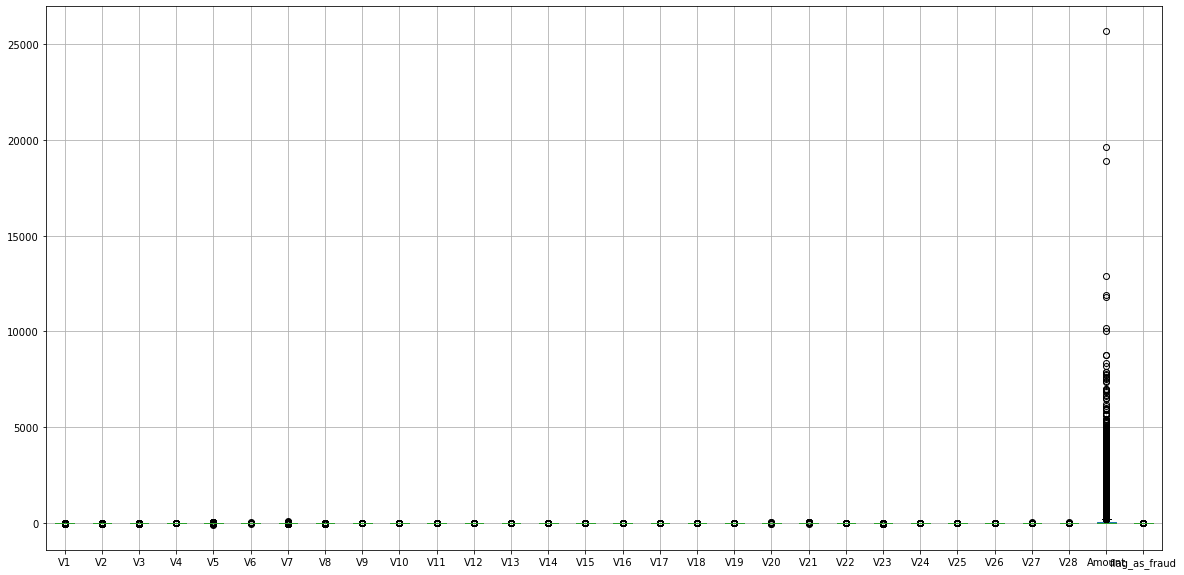

In [22]:
X.boxplot(figsize=(20,10))

## Normality

array([[<AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>],
       [<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>],
       [<AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>,
        <AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>],
       [<AxesSubplot:title={'center':'V21'}>,
        <AxesSubplot:title={'center':'V

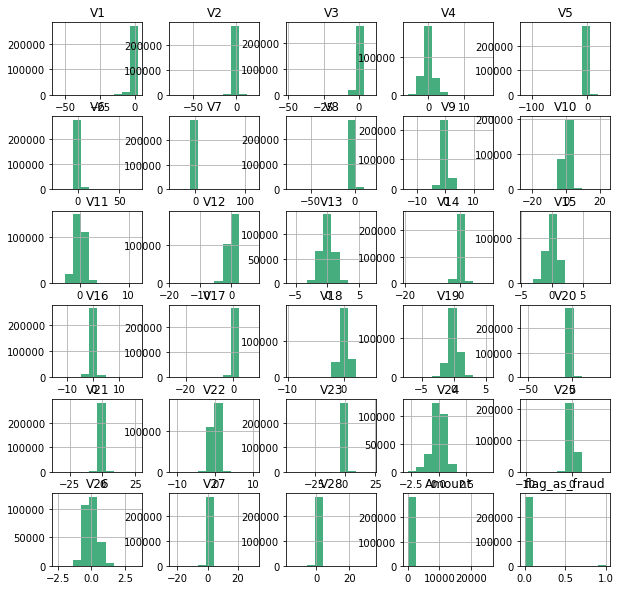

In [23]:

X.hist(figsize=(10,10),color="#45ad7e")

## Logistic Regression with imbalance data

In [24]:
#Create training and test set (XY split)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1000)

In [25]:
std_scaler=StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [26]:
#Define our model
model=LogisticRegression()

In [27]:
#fit our the model with our training set
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [28]:
# Get predicting values
predicted=model.predict(X_test_scaled)

Confusion matrix for the test set
[[85276    15]
 [   61    91]]


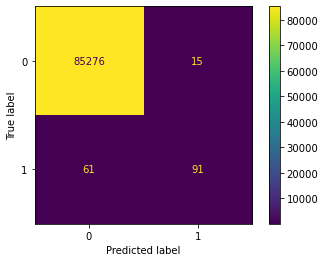

In [29]:
#print confussion matrix for the test set
print("Confusion matrix for the test set")
print(confusion_matrix(y_test,predicted))
plot_confusion_matrix(model,X_test_scaled,y_test, values_format = 'd')
plt.show()


In [30]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,predicted))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.86      0.60      0.71       152

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



We can see some improvement in our model compared with the "old way" method:
    - We have reduced the number of False Possitive
    - We have increaded the percentages of fraud cases. 
Important Note: The confussion matrix of our Linear Regression model has only a few obersations because we use the test set (30% of the total dataset)

## Data balance with SMOTE

In [31]:

smote=SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)



In [32]:
y_sm.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

## Logistic Regressionn combined with SMOTE

In [33]:
X=df.drop('Class', axis=1)
y=df.Class
X=X._get_numeric_data()

In [34]:
model= LogisticRegression()

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.30, random_state=1000)

std_scaler=StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [36]:
model.fit(X_train,y_train)

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
predicted=model.predict(X_test)

Confusion matrix for the test set
[[83300  1720]
 [ 5462 80107]]


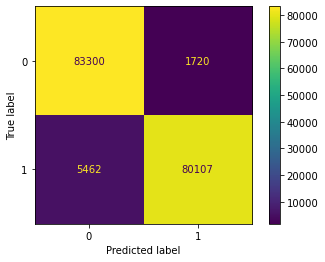

In [38]:
#print confussion matrix for the test set
print("Confusion matrix for the test set")
print(confusion_matrix(y_test,predicted))
plot_confusion_matrix(model,X_test,y_test, values_format = 'd')
plt.show()


In [39]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,predicted))

Classification report for the test set
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     85020
           1       0.98      0.94      0.96     85569

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



To combine logistic regression with SMOTE improves our results in terms of fraud detection. Now we get 93.54% of fraud cases. However the number of false positives increases drastically. 

## Decision Trees

In [40]:

#Define the model:
model= DecisionTreeClassifier(min_samples_leaf=400,max_depth=4)

In [41]:
#Create training and test set (XY split):
X_train, X_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.30, random_state=1000)

In [42]:
#fit our pipeline with our training set
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=400)

In [43]:
# Get predicting values
predicted=model.predict(X_test)

Confusion matrix for the train set
[[83103  1917]
 [ 6490 79079]]


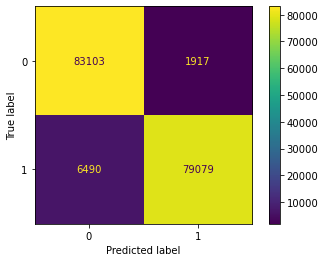

In [44]:
#print confussion matrix for the training set
print("Confusion matrix for the train set")
print(confusion_matrix(y_test,predicted))
plot_confusion_matrix(model,X_test,y_test, values_format = 'd')
plt.show()

In [45]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,predicted))

Classification report for the train set
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85020
           1       0.98      0.92      0.95     85569

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



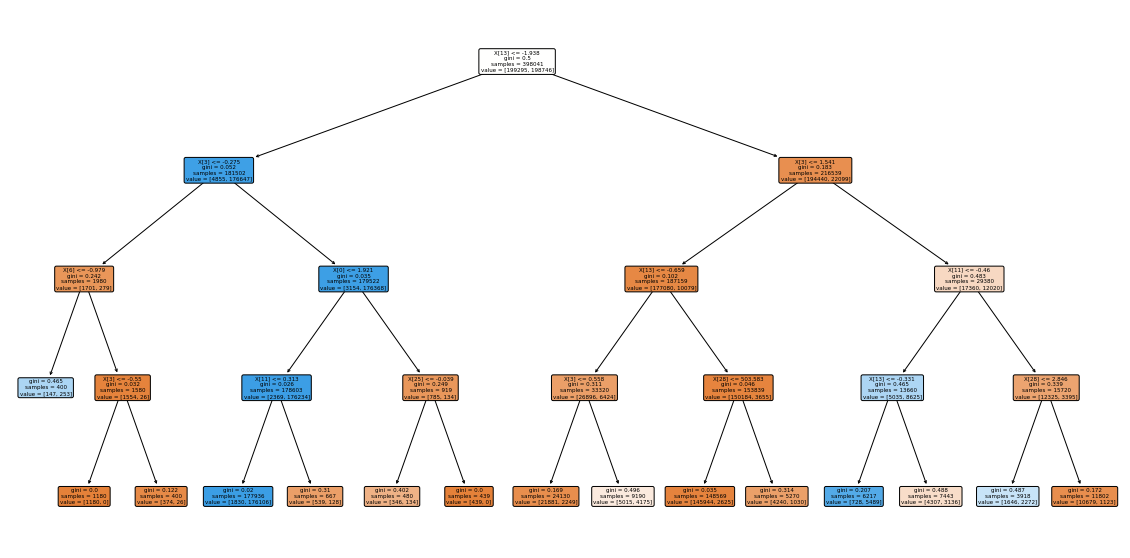

In [46]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(model,filled = True, rounded=True)
plt.show()  

## Random Forest

In [47]:
#Define model
model= RandomForestClassifier(max_depth=4,random_state=5)

In [48]:
#Create training and test set (XY split):
X_train, X_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.30, random_state=1000)

In [49]:
##fit our pipeline with our training set
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=5)

In [50]:
# Get predicting values
predicted=model.predict(X_test)

Confusion matrix for the train set
[[84546   474]
 [ 8182 77387]]


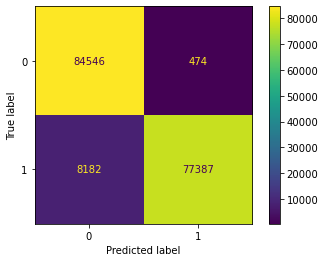

In [51]:
#print confussion matrix for the training set
print("Confusion matrix for the train set")
print(confusion_matrix(y_test,predicted))
plot_confusion_matrix(model,X_test,y_test, values_format = 'd')
plt.show()

In [52]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,predicted))

Classification report for the train set
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     85020
           1       0.99      0.90      0.95     85569

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

